<a href="https://colab.research.google.com/github/AdrianCCRS/littleProjects/blob/main/06_std_Notes_DataAnalysis_statDiscrim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-uis-student/raw/master/imgs/banner_IA.png"  width="1000px" height="250px">




# <center> **06. DATA ANALYSIS: STATISTIC TO DISCRIMINATE CLASSES** </center>



## **Outline**
1. **Understanding problems from data**
2. **Discriminating/classify from variable modelling**
3. **CLT-again discr**






In [ ]:
#@title *Execute this cell*
#@markdown Please include your student id
import sys
import inspect

group_id = "IA1-20242-E1" #@param {type:"string"}
assignment_id = group_id +'.data_analysis'
code_subject = '5'
student_id = "2220075" #@param {type:"string"}
"""
Put your student ID here

Example: student_id =  '2152145'
"""

"\nPut your student ID here\n\nExample: student_id =  '2152145'\n"

In [ ]:
#@title **Execute this cell**
#@markdown **UTILS**
#@markdown Please dont modify any line in this cell

import os
import json
import requests
from collections import namedtuple


Config = namedtuple('Config', ['server_name', 'course_name', 'student_id'])
config = Config(server_name='https://azuregrader.azurewebsites.net/api',
                course_name='ai1', student_id='2162107')


def check_solution(assignment_id, student_func_str):

    # Set the endpoint and payload.
    payload = {'func_str': student_func_str, 'assignment_id': assignment_id}
    endpoint_url = config.server_name + '/CheckSolution'
    # print(endpoint_url)

    # Make request to server with the data coming from the notebook.
    r = requests.get(endpoint_url, params=payload)
    pprint_json_response(r.json())
    return r


def check_solution_and_evaluate(assignment_id: str, student_func_str: str):

    # Set the endpoint and payload.
    payload = {
        'func_str': student_func_str,
        'assignment_id': assignment_id,
        'student_id': student_id
    }
    endpoint_url = config.server_name + '/CheckAndEvaluateSolution'
    # print(endpoint_url)

    # Make request to server with the data coming from the notebook.
    r = requests.post(endpoint_url, params=payload)
    pprint_json_response(r.json())
    return r


def pprint_json_response(response, indent=0):
    """Pretty print the response."""
    for key, value in response.items():
        print('\t' * indent + str(key.capitalize()))

        # If dictionary, do a recurrent call.
        if isinstance(value, dict):
            pprint_json_response(value, indent + 1)
        else:
            # Enumerate elements if list.
            if isinstance(value, list):
                if len(value) == 1:
                    print('\t' * (indent + 1) + str(value[0]))
                else:
                    for i, e in enumerate(value, start=1):
                        print('\t' * (indent + 1) + f'{i}. {e}')
            else:
                print('\t' * (indent + 1) + str(value))

In [ ]:
#@title **MONTAR EL DRIVE** { display-mode: "form" }
import os
from google.colab import drive

path_ai = "Inteligencia Artificial 2024-II/ai-uis-student" #@param {type:"string"}
path = "/content/drive/My Drive/" + path_ai
drive.mount('/content/drive')
os.chdir(path)
print(os.getcwd())

Mounted at /content/drive
/content/drive/My Drive/Inteligencia Artificial 2024-II/ai-uis-student


In [ ]:
#@title **1. Professor:** MONTAR EL DRIVE  (If you are in in colab){ display-mode: "form" }
import os
from google.colab import drive
drive.mount('/content/drive')

os.chdir('/content/drive/My Drive/main/academic/courses/2018-UIS-AritfitialInteligence/ai-uis-professor/')
print(os.getcwd())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/My Drive/main/academic/courses/2018-UIS-AritfitialInteligence/ai-uis-professor/'

In [ ]:
#@title **Load libs** { display-mode: "form" }
#@markdown **SciPy** contains additional routines needed in scientific work: for example, routines for computing integrals numerically, solving differential equations, optimization, and sparse matrices.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

sns.set_theme()
pd.__version__

'2.1.4'

#**1. Understanding problems from data**

we can obtain a dataset of a set of patients diagnosed with breast cancer and control patients. Each patient is characterized by an histological analysis, by measuring geometrical properties in the nuclei. See an image example of sample, where nuclei is characterized:


<center> <img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-uis-student/raw/master/imgs/imagenBreast.jpg" width="240" > </center>

We going to load a related dataset, and then we going to analyze with statistical tools.

In [ ]:
#@title **code**
data_breast = pd.read_csv('data/breast_cancer.csv')
data_breast.diagnosis.replace(to_replace='M', value=1, inplace=True)
data_breast.diagnosis.replace(to_replace='B', value=0, inplace=True)
data_breast = data_breast.sample(frac=1, replace=True)
print(data_breast.shape)

data_breast.head(10)

(569, 33)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
12,846226,1,19.17,24.80,132.40,1123.0,0.09740,0.24580,0.20650,0.111800,...,29.94,151.70,1332.0,0.1037,0.39030,0.36390,0.17670,0.3176,0.10230,NaN
316,894090,0,12.18,14.08,77.25,461.4,0.07734,0.03212,0.01123,0.005051,...,16.47,81.60,513.1,0.1001,0.05332,0.04116,0.01852,0.2293,0.06037,NaN
385,90291,1,14.60,23.29,93.97,664.7,0.08682,0.06636,0.08390,0.052710,...,31.71,102.20,758.2,0.1312,0.15810,0.26750,0.13590,0.2477,0.06836,NaN
136,868223,0,11.71,16.67,74.72,423.6,0.10510,0.06095,0.03592,0.026000,...,25.48,86.16,546.7,0.1271,0.10280,0.10460,0.06968,0.1712,0.07343,NaN
239,88330202,1,17.46,39.28,113.40,920.6,0.09812,0.12980,0.14170,0.088110,...,44.87,141.20,1408.0,0.1365,0.37350,0.32410,0.20660,0.2853,0.08496,NaN
244,884180,1,19.40,23.50,129.10,1155.0,0.10270,0.15580,0.20490,0.088860,...,30.53,144.90,1417.0,0.1463,0.29680,0.34580,0.15640,0.2920,0.07614,NaN
462,9113156,0,14.40,26.99,92.25,646.1,0.06995,0.05223,0.03476,0.017370,...,31.98,100.40,734.6,0.1017,0.14600,0.14720,0.05563,0.2345,0.06464,NaN
165,8712291,0,14.97,19.76,95.50,690.2,0.08421,0.05352,0.01947,0.019390,...,25.82,102.30,782.1,0.1045,0.09995,0.07750,0.05754,0.2646,0.06085,NaN
324,89511501,0,12.20,15.21,78.01,457.9,0.08673,0.06545,0.01994,0.016920,...,21.38,91.11,583.1,0.1256,0.19280,0.11670,0.05556,0.2661,0.07961,NaN
154,8711002,0,13.15,15.34,85.31,538.9,0.09384,0.08498,0.09293,0.034830,...,20.50,97.67,677.3,0.1478,0.22560,0.30090,0.09722,0.3849,0.08633,NaN


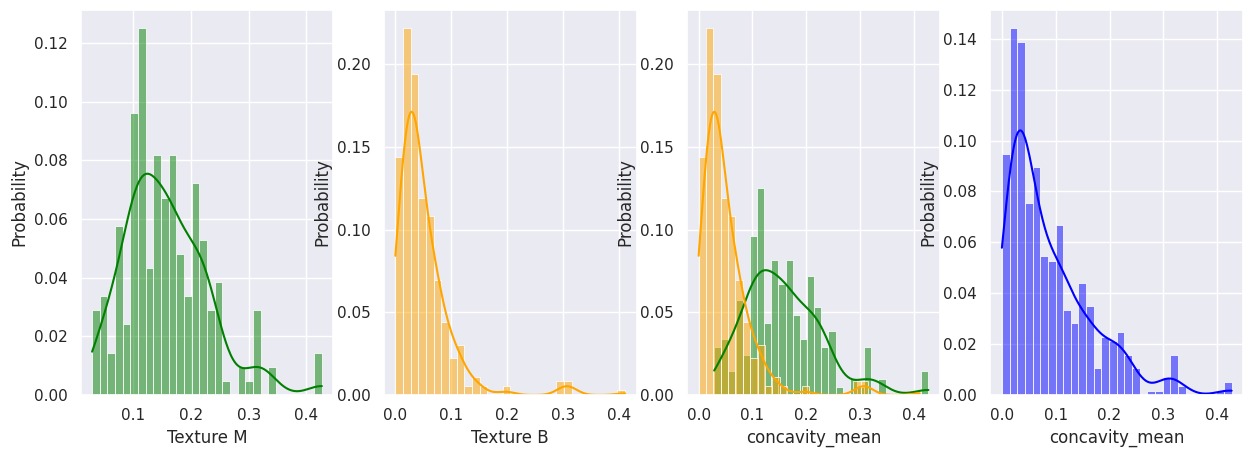

In [ ]:
#@title **code:** do these distributions look familiar?
plt.figure(figsize=(15,5))
plt.subplot(1,4, 1);
ax=sns.histplot(data_breast.concavity_mean[data_breast.diagnosis ==1], kde=True, color='green', bins=30, stat='probability');
ax.set(xlabel="Texture M")
plt.subplot(1,4, 2);
ax=sns.histplot(data_breast.concavity_mean[data_breast.diagnosis ==0], kde=True, color='orange', bins=30, stat='probability');
ax.set(xlabel="Texture B")
plt.subplot(1,4, 3);
sns.histplot(data_breast.concavity_mean[data_breast.diagnosis ==1], kde=True, color='green', bins=30, stat='probability');
sns.histplot(data_breast.concavity_mean[data_breast.diagnosis ==0], kde=True, color='orange', bins=30, stat='probability');
plt.subplot(1,4, 4);
sns.histplot(data_breast.concavity_mean, kde=True, color='blue', bins=30, stat='probability');


<Axes: >

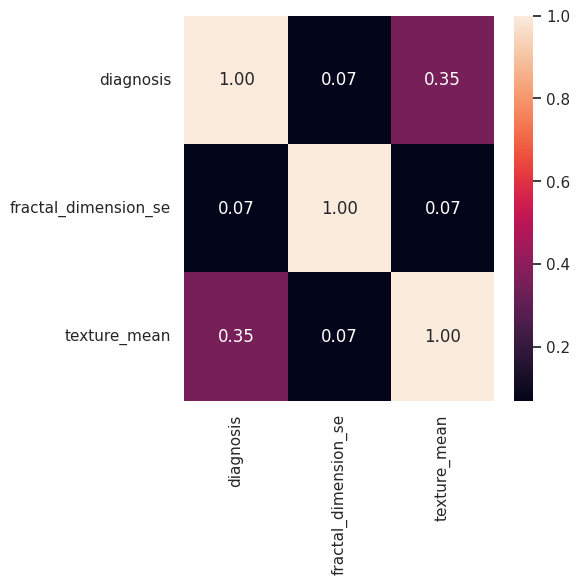

In [ ]:
#@title **code** we can compute the correlation
#@markdown  we can compute analytically correlations
plt.subplots(figsize=(5,5)) #Importante para que se vean todas las correlaciones
corr = data_breast[['diagnosis', 'fractal_dimension_se', 'texture_mean']].corr()
sns.heatmap(corr, annot=True, fmt=".2f")

<Axes: >

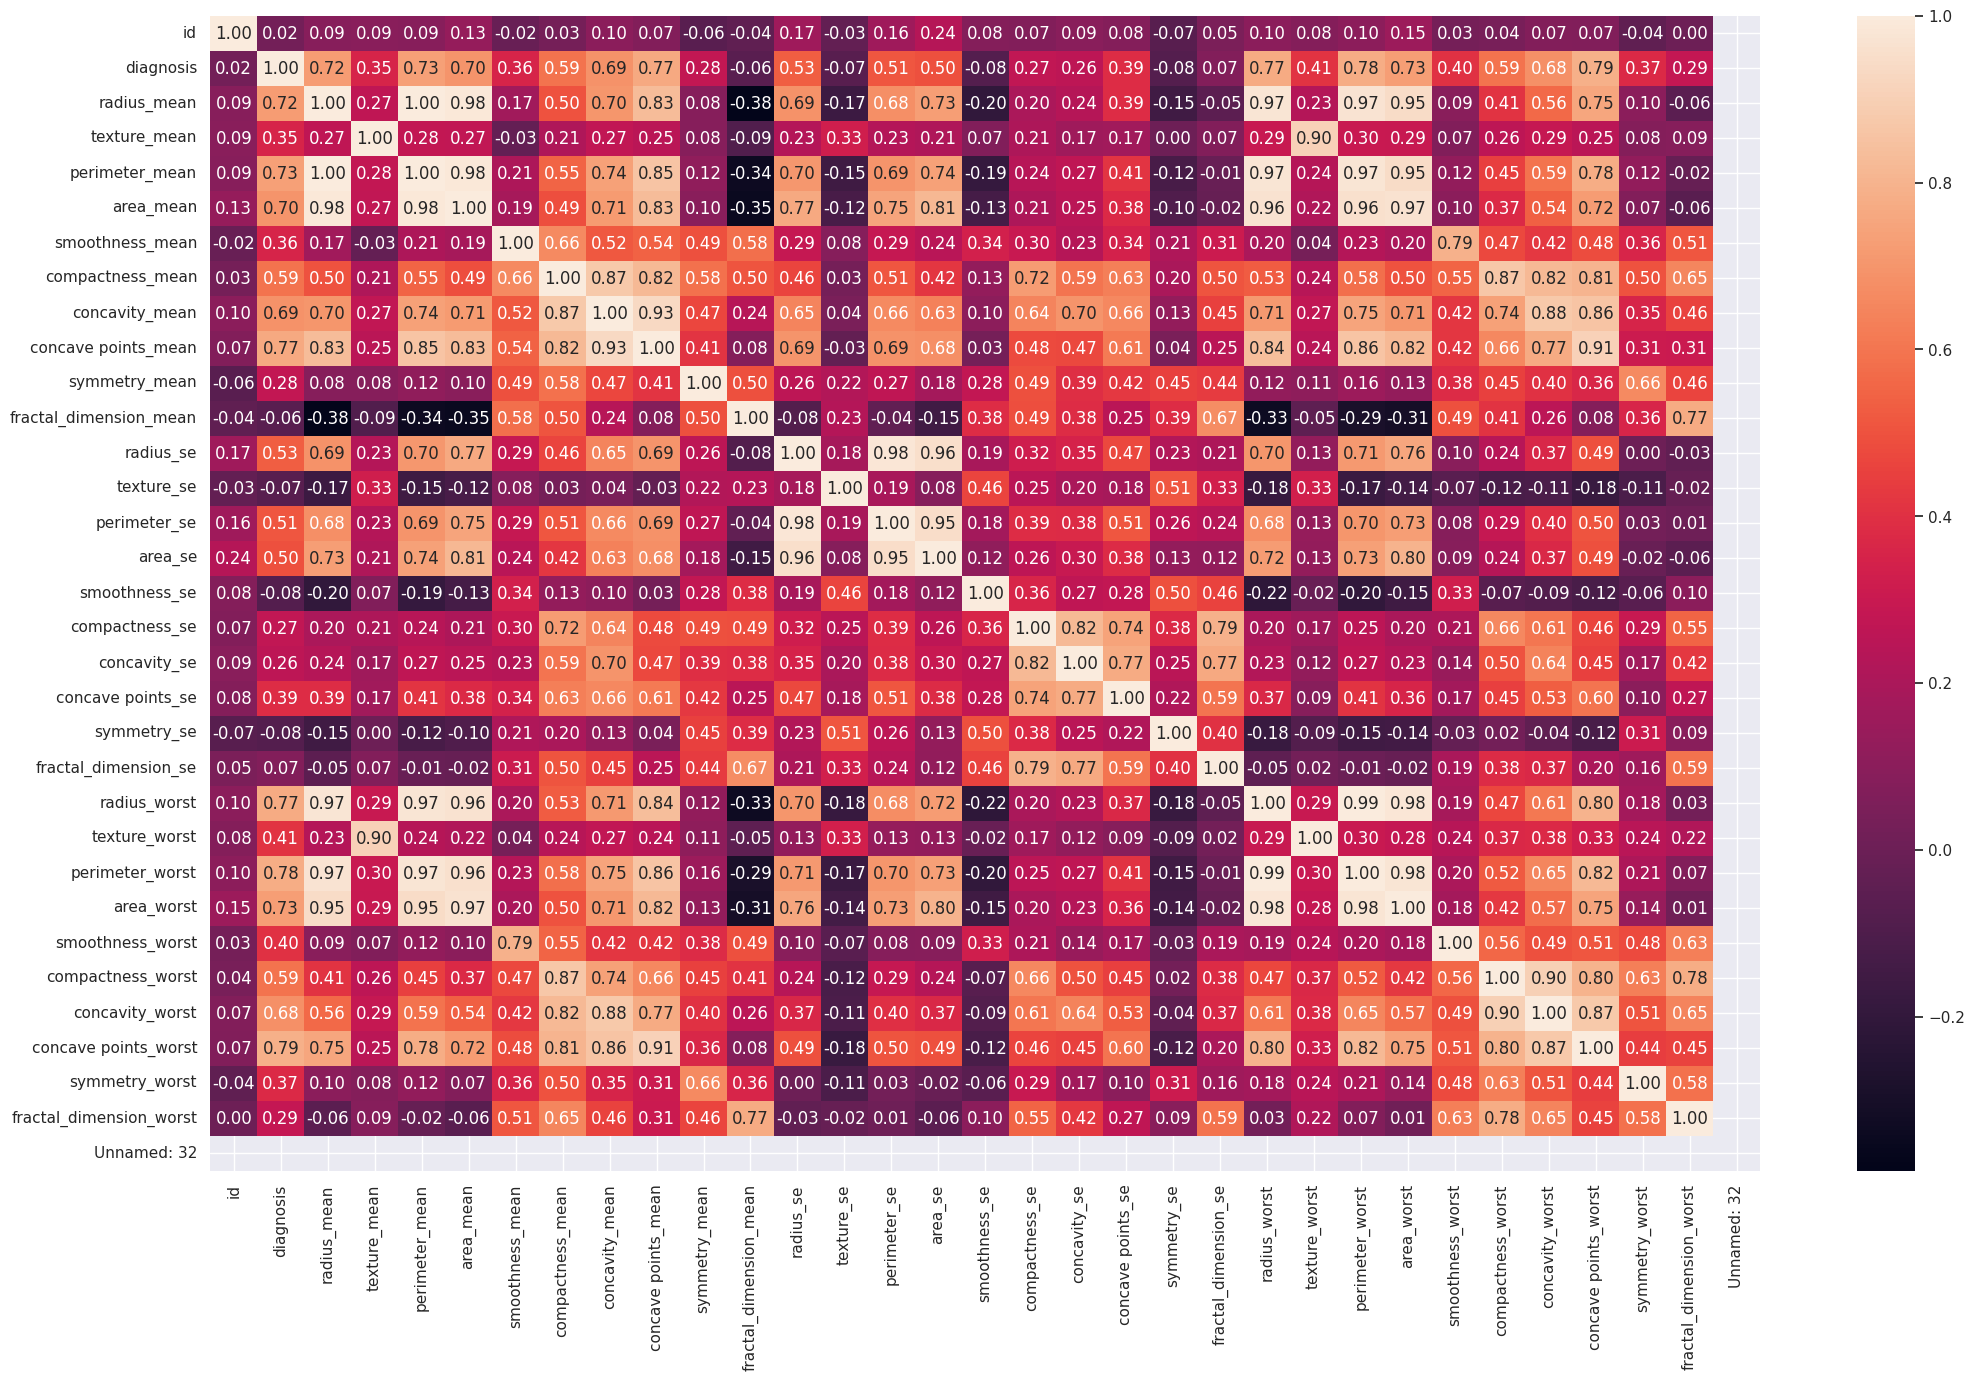

In [ ]:
#@markdown **full correlation**
plt.subplots(figsize=(25,15))
corr = data_breast.corr()
sns.heatmap(corr, annot=True, fmt=".2f")

<Axes: >

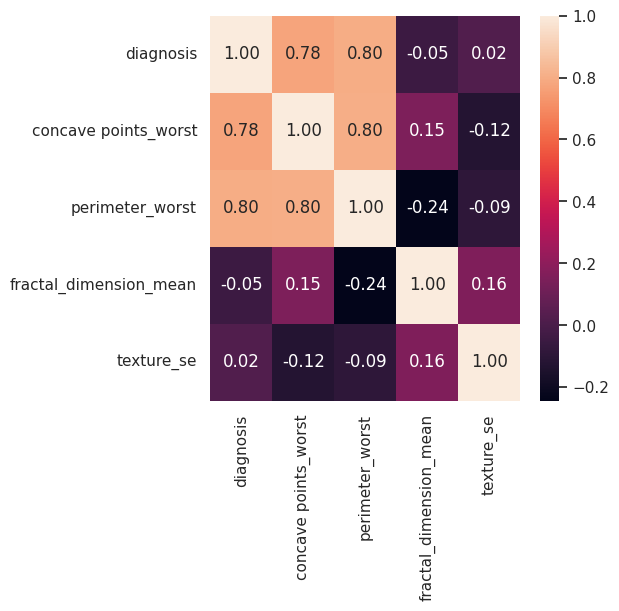

In [ ]:
#plt.figure(figsize=(10,7))
#plt.subplot(2,2, 1);
#sns.histplot(data_breast["concave points_worst"][data_breast.diagnosis == 1], kde=True, color='green', bins=30, stat='probability');
#sns.histplot(data_breast["concave points_worst"][data_breast.diagnosis == 0], kde=True, color='blue', bins=30, stat='probability');
#plt.subplot(2,2, 2);

plt.subplots(figsize=(5,5)) #Importante para que se vean todas las correlaciones
corr = data_breast[['diagnosis','concave points_worst', 'perimeter_worst', 'fractal_dimension_mean', 'texture_se']].corr()
sns.heatmap(corr, annot=True, fmt=".2f")


**In summary**. The distributions provide a parameterized mathematical function that can be used to calculate the probability from a observable population:
- Some known distributions are: the uniform, the normal (famous), the Poisson (temporal), the Bernoulli (binary)
- For instance, the distribution of texture of nucleui in breast cancer.
- The distribution can be analized from PDF (Probability Density function) and CDF (Cumulative Density function)
  - PDF. The probability of observing a given value.
  - CDF. The probability of an observation equal or less than a value.



analytically: 22.013413461538462
empirically: 22.013413461538462
analytically: 0.703
empirically: 0.716


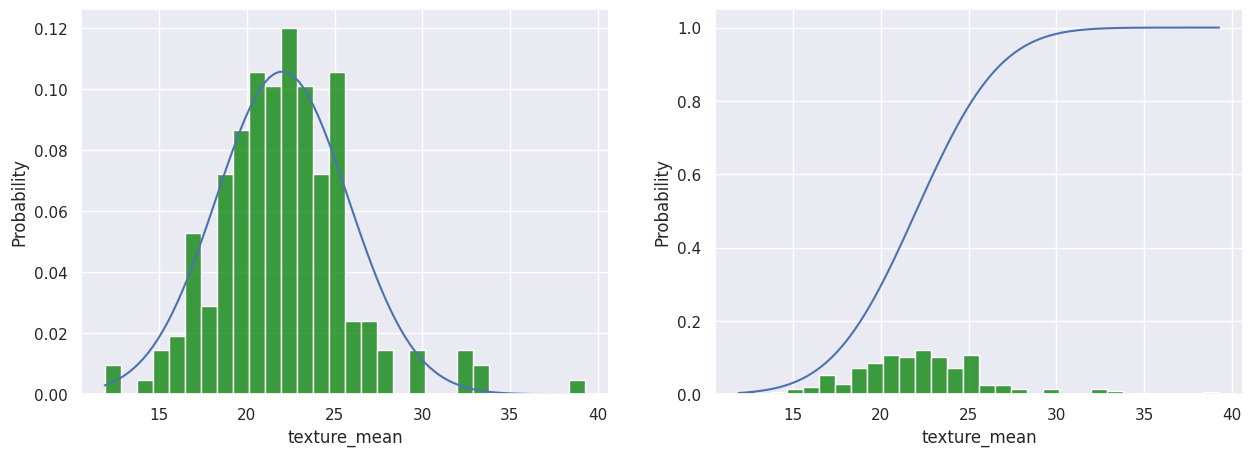

In [ ]:
# @ title **code**
# CDF= cumulative distribution function
import numpy as np
import scipy.stats as stats


text_m = data_breast.texture_mean[data_breast.diagnosis ==1]
text_b   = data_breast.texture_mean[data_breast.diagnosis ==0]

text_m_dis =  stats.norm(loc=np.mean(text_m), scale=np.std(text_m))
text_b_dis =  stats.norm(loc=np.mean(text_b), scale=np.std(text_b))


plt.figure(figsize=(15,5))
plt.subplot(1,2, 1);
t = np.linspace(np.min(text_m), np.max(text_m), 100)
plt.plot(t, text_m_dis.pdf(t), label="pdf")
sns.histplot(data_breast.texture_mean[data_breast.diagnosis ==1], color='green', bins=30, stat='probability');
plt.subplot(1,2, 2);
sns.histplot(data_breast.texture_mean[data_breast.diagnosis ==1], color='green', bins=30, stat='probability');
plt.plot(t, text_m_dis.cdf(t), label="pdf")
# @ markdown we can use the CDF to answer previous question
print("analytically:", text_m_dis.mean())
print('empirically:', text_m.mean(axis=0))
print("analytically:", "%.3f"%(1-text_m_dis.cdf(20)))
print('empirically:', "%.3f"%np.mean(text_m>20))

#**2. Discriminating/classify from variable modelling**


From distribution we can answer ans understand population patterns. Such patterns can be codified and evolved in computational tools to support decisions, process, among many others. For instance, in medical aplications, this analysis are the core for **computer aided diagnosis (CADS)**:     


<center> <img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-uis-student/raw/master/imgs/cads.png" width="400" > </center>


For instance, Observe next distribution of a particular variable. Can we use this information to support diagnosis?

<Axes: xlabel='diagnosis', ylabel='fractal_dimension_se'>

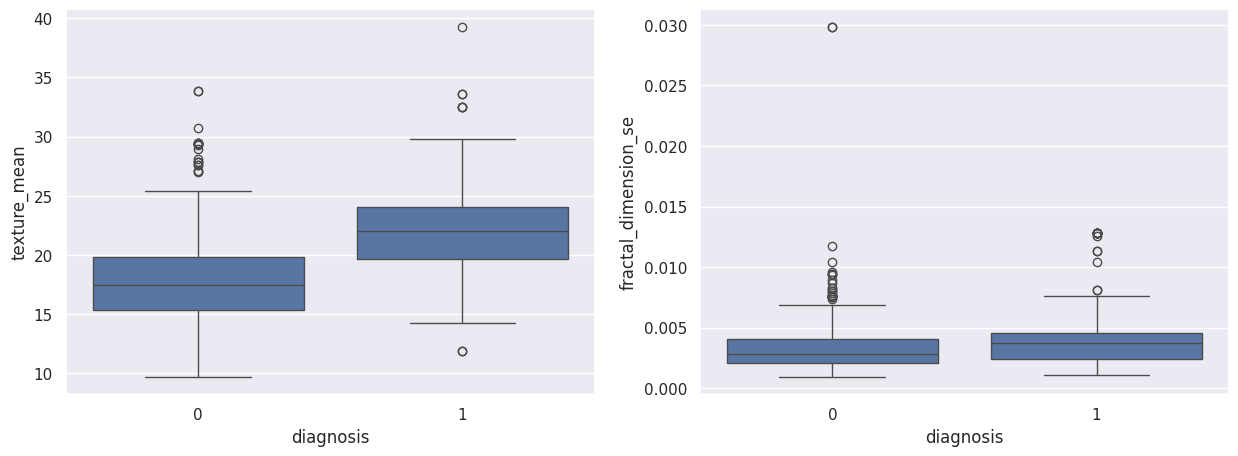

In [ ]:
#@title **code** Can you support diagnosis from such variables?
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(x="diagnosis", y="texture_mean", data=data_breast)
plt.subplot(1,2,2)
sns.boxplot(x="diagnosis", y="fractal_dimension_se", data=data_breast)

<Axes: xlabel='diagnosis', ylabel='fractal_dimension_se'>

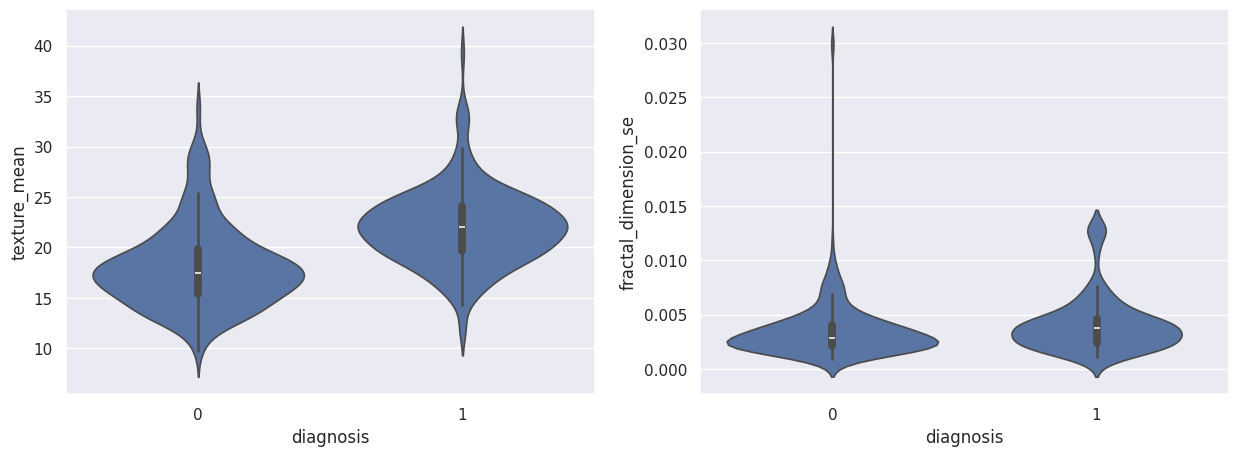

In [ ]:
#@title **code**  We can better analyze from violinplots!
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.violinplot(x="diagnosis", y="texture_mean", data=data_breast)
plt.subplot(1,2,2)
sns.violinplot(x="diagnosis", y="fractal_dimension_se", data=data_breast)

We can "simply" compute pdf and cdf and to _"code a rule"_ to decide if the sample belongs to a malignant or benign diagnosis.

- Suppose that we have the result of a patient with texture mean of = 17.43. (patient id 246). From this result which class correspond?

- Suppose that we have the result of a patient with texture mean of = 22.91. (patient id 118). From this result which class correspond?


**which class (bening or malignant) do you think they belong to? with what probability?**

In [ ]:

import numpy as np
import scipy.stats as stats

index_benign = 246 #@ param {type:"integer"}
index_malign = 118 #@ param {type:"integer"}

gt_diag_B = data_breast.diagnosis[index_benign]
t_b_sample = data_breast.texture_mean[index_benign]
t_m_sample = data_breast.texture_mean[index_malign]
gt_diag_M =  data_breast.diagnosis[index_malign]

text_m = data_breast.texture_mean[data_breast.diagnosis ==1]
text_b   = data_breast.texture_mean[data_breast.diagnosis ==0]

text_m_dis =  stats.norm(loc=np.mean(text_m), scale=np.std(text_m))
text_b_dis =  stats.norm(loc=np.mean(text_b), scale=np.std(text_b))

lower_bound = text_m_dis.ppf(0.01); upper_bound = text_m_dis.ppf(0.99)
x, tx_M_cont = np.linspace(lower_bound, upper_bound, 100, retstep=True)
lb = text_b_dis.ppf(0.01); ub = text_b_dis.ppf(0.99)
xb, tx_B_cont = np.linspace(lb, ub, 100, retstep=True)
print('sum 1 the prob', np.sum(tx_M_cont*text_m_dis.pdf(x)))
print('sum 1 the prob', np.sum(tx_B_cont*text_b_dis.pdf(xb)))


def classification_from_stat(text_sample):
  est_b = tx_B_cont*text_b_dis.pdf(text_sample)
  est_m = tx_M_cont*text_m_dis.pdf(text_sample)
  print('est_b: ', est_b, 'est_m: ', est_m)
  class_est = 0 if est_b.any()>est_m.any() else  1
  return class_est

classification_from_stat(t_b_sample)

# first classification example
print("estimated class: ", classification_from_stat(t_b_sample), "the ground truth: ", gt_diag_B)

# second classification example
print("estimated class: ", classification_from_stat(t_m_sample), "the ground truth: ", gt_diag_M)


sum 1 the prob 0.9812297466603902
sum 1 the prob 0.9812297466603902
est_b:  0.01851813809248682 est_m:  0.0089591745960843
est_b:  0.01851813809248682 est_m:  0.0089591745960843
estimated class:  1 the ground truth:  0
est_b:  [0.00944034 0.00944034] est_m:  [0.01822667 0.01822667]
estimated class:  1 the ground truth:  118    1
118    1
Name: diagnosis, dtype: int64


In [ ]:
#@title  **code**

import numpy as np
import scipy.stats as stats

index_benign = 246 #@ param {type:"integer"}
index_malign = 118 #@ param {type:"integer"}

gt_diag_B = data_breast.diagnosis[index_benign]
t_b_sample = data_breast.texture_mean[index_benign]
t_m_sample = data_breast.texture_mean[index_malign]
gt_diag_M =  data_breast.diagnosis[index_malign]


text_m = data_breast.texture_mean[data_breast.diagnosis ==1]
text_b   = data_breast.texture_mean[data_breast.diagnosis ==0]
text_m_dis =  stats.norm(loc=np.mean(text_m), scale=np.std(text_m))
text_b_dis =  stats.norm(loc=np.mean(text_b), scale=np.std(text_b))
lower_bound = text_m_dis.ppf(0.01); upper_bound = text_m_dis.ppf(0.99)
x, tx_M_cont = np.linspace(lower_bound, upper_bound, 100, retstep=True)
lb = text_b_dis.ppf(0.01); ub = text_b_dis.ppf(0.99)
xb, tx_B_cont = np.linspace(lb, ub, 100, retstep=True)
print('sum 1 the prob', np.sum(tx_M_cont*text_m_dis.pdf(x)))
print('sum 1 the prob', np.sum(tx_B_cont*text_b_dis.pdf(xb)))


def classification_from_stat(text_sample):
  est_b = tx_B_cont*text_b_dis.pdf(text_sample)
  est_m = tx_M_cont*text_m_dis.pdf(text_sample)
  print('est_b: ', est_b, 'est_m: ', est_m, type(est_m), est_m.shape)
  class_est = 0 if est_b.any()>est_m.any() else  1
  return class_est


# first classification example
print("estimated class: ", classification_from_stat(t_b_sample), "the ground truth: ", gt_diag_B)

# second classification example
print("estimated class: ", classification_from_stat(t_m_sample), "the ground truth: ", gt_diag_M)

sum 1 the prob 0.9812297466603902
sum 1 the prob 0.9812297466603902
est_b:  0.01851813809248682 est_m:  0.0089591745960843 <class 'numpy.float64'> ()
estimated class:  1 the ground truth:  0
est_b:  [0.00944034 0.00944034] est_m:  [0.01822667 0.01822667] <class 'numpy.ndarray'> (2,)
estimated class:  1 the ground truth:  118    1
118    1
Name: diagnosis, dtype: int64


<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/icon1.png" width="200">

We can do the same with the fractal variable.
- Code a function that compute the prediction of diagnosis class, according to the larger probability with respect to the malignant and benign distributions of `fractal_dimension_se`

** How confident are these results?

In [ ]:
#@title **code student**



# first classification example
print("estimated class: ", classification_from_stat(t_b_sample), "the ground truth: ", gt_diag_B)

# second classification example
print("estimated class: ", classification_from_stat(t_m_sample), "the ground truth: ", gt_diag_M)

# **2.Central Limit Theorem (CLT)**


How much the original breast cancer data belongs to a normal distributions?

- We can run an experiment with multiple samples, to observe how distribution of the mean is approximated to a **Gaussian distribution**

- We need to take some theretical but useful things!!...
- We need to know which means the  **mean**: the expected value
- Then we compute the distribution of multiple means: **The CLT**
- Wewill know about `iid` referred to as independent and identically distributed


<Axes: ylabel='Probability'>

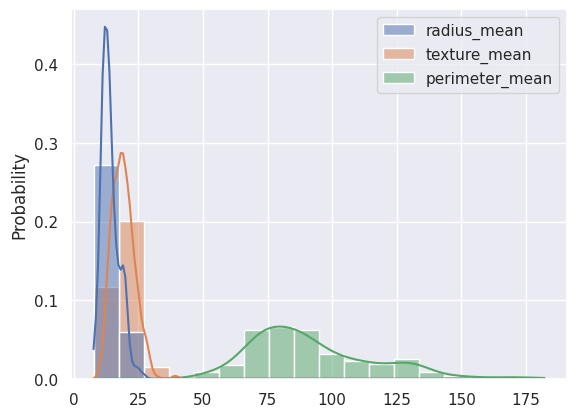

In [ ]:
#@title **code**
subset_variables = list(data_breast.columns)[2:5]
sns.histplot(data=data_breast[subset_variables], kde=True,stat='probability')

### **2.2 Central Limit Theorem**

The probability distribution of the mean of i.i.d random variables with finite variance is close to a **normal distribution** the the population size increase.

A summary to proof central limit theorem is:

1. Take a sample of size N=2 from any distribution
2. Compute the **sample mean**
3. Repeat 100 times

4. Plot the distribution of the **sample mean**
5. Repeat for N=4,10,30

**Agregations of i.i.d. random variables are distributed as a Gaussian**:

$$\left [  \frac{X_1 + ... + X_N}{N} ⋯ \frac{X_1 + ... + X_N}{N} \right ]_k \sim \mathcal{N} \left ( \mu(X), \frac{\sigma(X)}{\sqrt{N}} \right )$$


**i.i.d** if each random variable has the same distribution and all of them are mutually independent.

The central limit theorem allows us use statistics of samples without know about particular shape distribution of the population.

See an example to built a Gaussian distribution from a Poisson distribution

Now...
We can built an estimation of a Gaussian distribution of the mean experiments for our variable malingnant of interest.

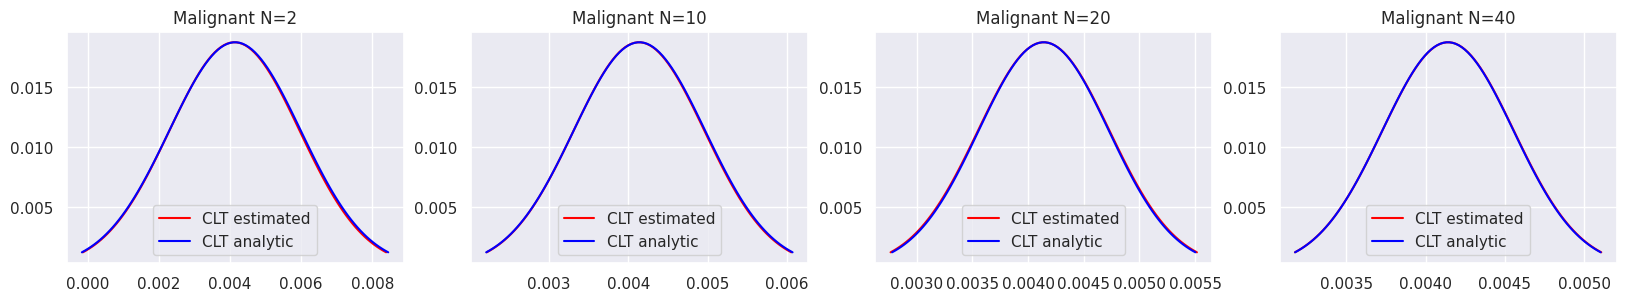

In [ ]:
#@title **code**
plt.figure(figsize=(20,3))
text_m = data_breast.fractal_dimension_se[data_breast.diagnosis ==1]
text_b   = data_breast.fractal_dimension_se[data_breast.diagnosis ==0]
d_mean = np.mean(text_m)
d_std  = np.std(text_m)

for i,N in enumerate([2,10,20, 40]):
  sample_means_m = []
  sample_means_m = np.r_[[np.mean(np.random.choice(text_m, size=N)) for _ in range(10000)]]

  plt.subplot(1,4,i+1)

  estimat_c = stats.norm(loc=np.mean(sample_means_m), scale=np.std(sample_means_m))
  x_ref_estim, ref_cont_estim = np.linspace(estimat_c.ppf(0.01), estimat_c.ppf(0.99), 100, retstep=True)
  plt.plot(x_ref_estim, ref_cont_estim*estimat_c.pdf(x_ref_estim), label="CLT estimated", color="red")


  analyt_c = stats.norm(loc=d_mean, scale=d_std/np.sqrt(N))
  x_ref_analy, ref_cont_analy = np.linspace(analyt_c.ppf(0.01), analyt_c.ppf(0.99), 100, retstep=True)
  plt.plot(x_ref_analy, ref_cont_analy*analyt_c.pdf(x_ref_analy), label="CLT analytic", color="blue")



  plt.title("Malignant N=%d"%N)
  plt.legend()



 <img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/icon1.png" width="200">

- Create Gaussian distribution of means for Malignant and bening fractal distributions

In [ ]:
#@title  **code student**




**How confident are these results?? ..coming soon !**

---
<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-uis-student/raw/master/imgs/bannerThanks.jpg" alt="Drawing" style="width:700px;">
